In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 把題目分成train test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                   boston["target"],
                                                   test_size=0.1)


In [3]:
# 選擇學習方式
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)

In [4]:
# 開始做考古題
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [5]:
# 驗證模型好壞
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("預測的答案:", list(reg.predict(x_test)))
print("正確的答案:", list(y_test))
print("R2 score:", r2_score(y_test, pre))


預測的答案: [20.95075757575757, 20.95075757575757, 23.920930232558142, 9.8725, 29.746153846153845, 17.41276595744681, 17.41276595744681, 20.95075757575757, 20.95075757575757, 17.41276595744681, 30.423076923076927, 23.920930232558142, 23.920930232558142, 20.95075757575757, 20.95075757575757, 34.04615384615385, 25.91875, 20.95075757575757, 18.31, 23.920930232558142, 25.91875, 9.8725, 20.95075757575757, 15.0, 20.95075757575757, 9.8725, 50.0, 17.41276595744681, 9.8725, 20.95075757575757, 17.41276595744681, 30.423076923076927, 20.95075757575757, 15.200000000000003, 46.11764705882352, 23.920930232558142, 23.920930232558142, 30.423076923076927, 25.91875, 20.95075757575757, 13.911764705882351, 46.11764705882352, 20.95075757575757, 17.41276595744681, 15.0, 30.423076923076927, 25.91875, 20.95075757575757, 18.31, 25.91875, 25.91875]
正確的答案: [17.6, 23.1, 19.4, 11.5, 33.8, 13.6, 15.6, 21.7, 16.1, 13.4, 27.9, 25.3, 24.8, 22.0, 17.5, 37.0, 30.5, 23.3, 18.5, 21.9, 23.8, 13.8, 20.6, 10.4, 23.9, 8.8, 50.0, 15

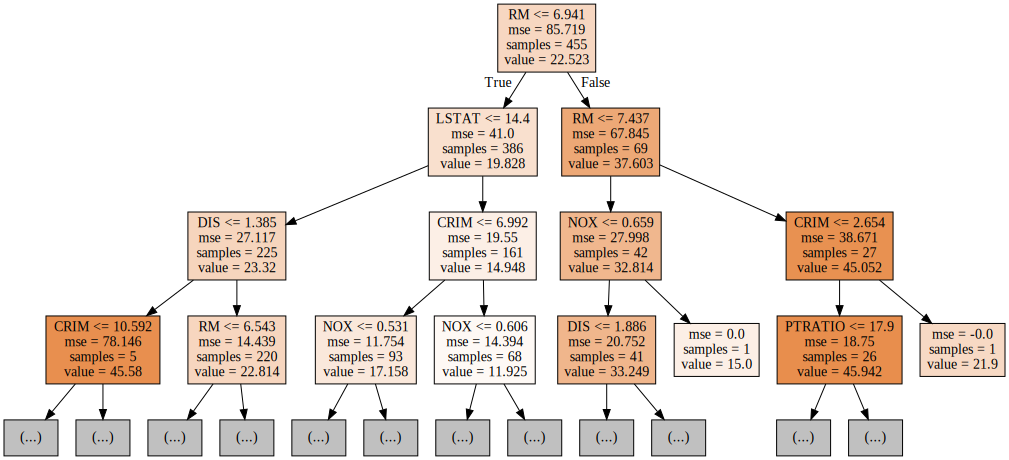

In [6]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, 
                   feature_names=boston["feature_names"],
                    max_depth=3,
                   filled=True)
graphviz.Source(g)